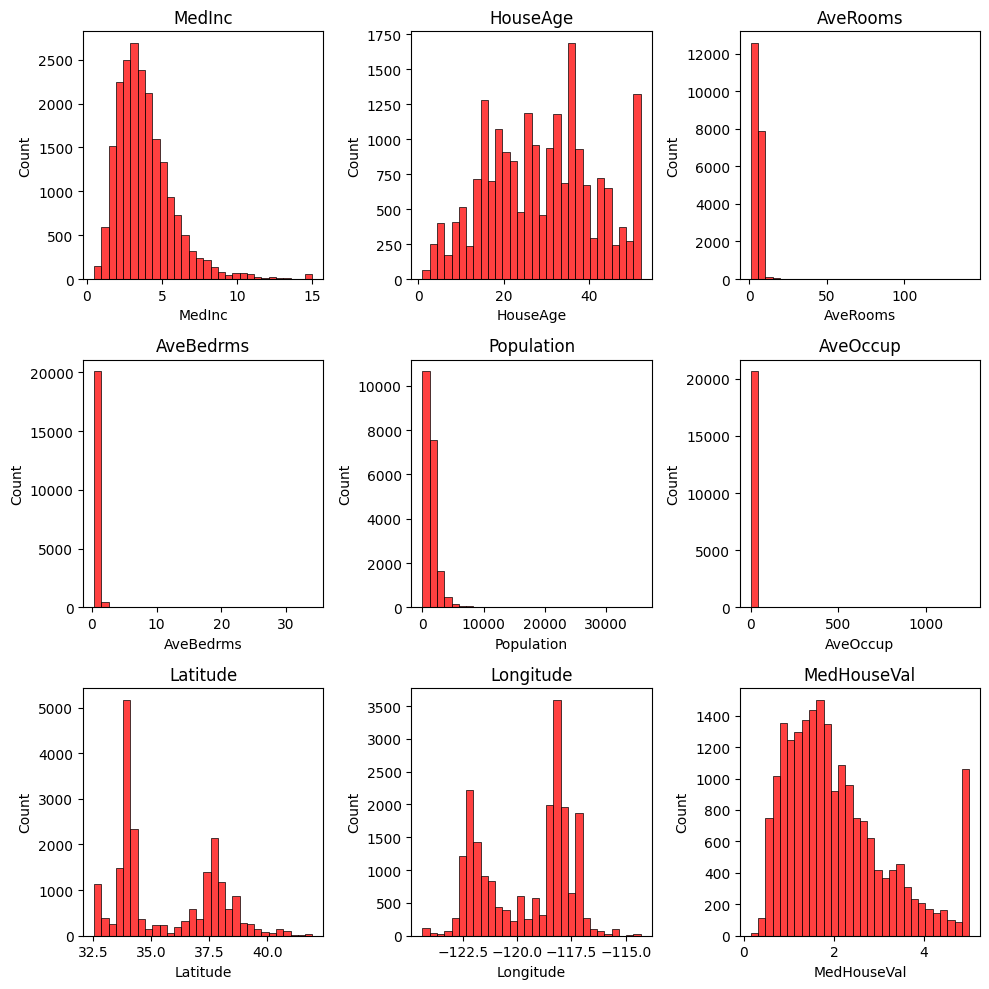

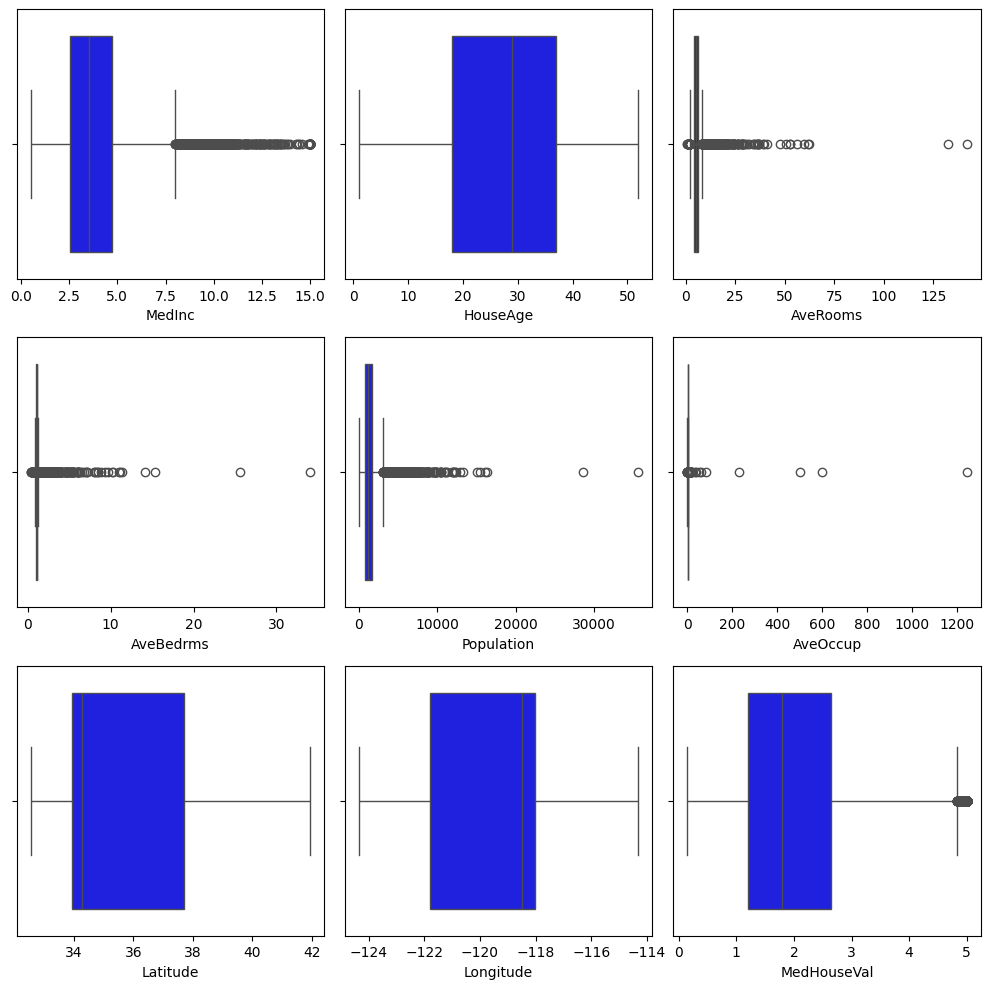

In [25]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data=fetch_california_housing(as_frame=True)
housing_df=data.frame.copy()
numerical_features=housing_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(housing_df[feature],bins=30,color="red")
    plt.title(feature)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=housing_df[feature],color="blue")
plt.tight_layout()
plt.show()


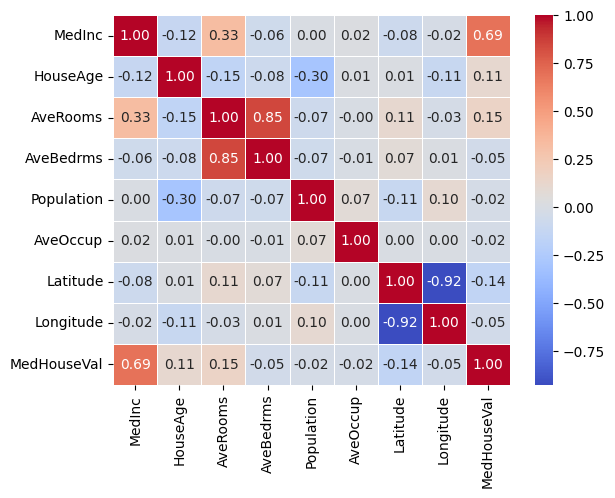

<Figure size 500x800 with 0 Axes>

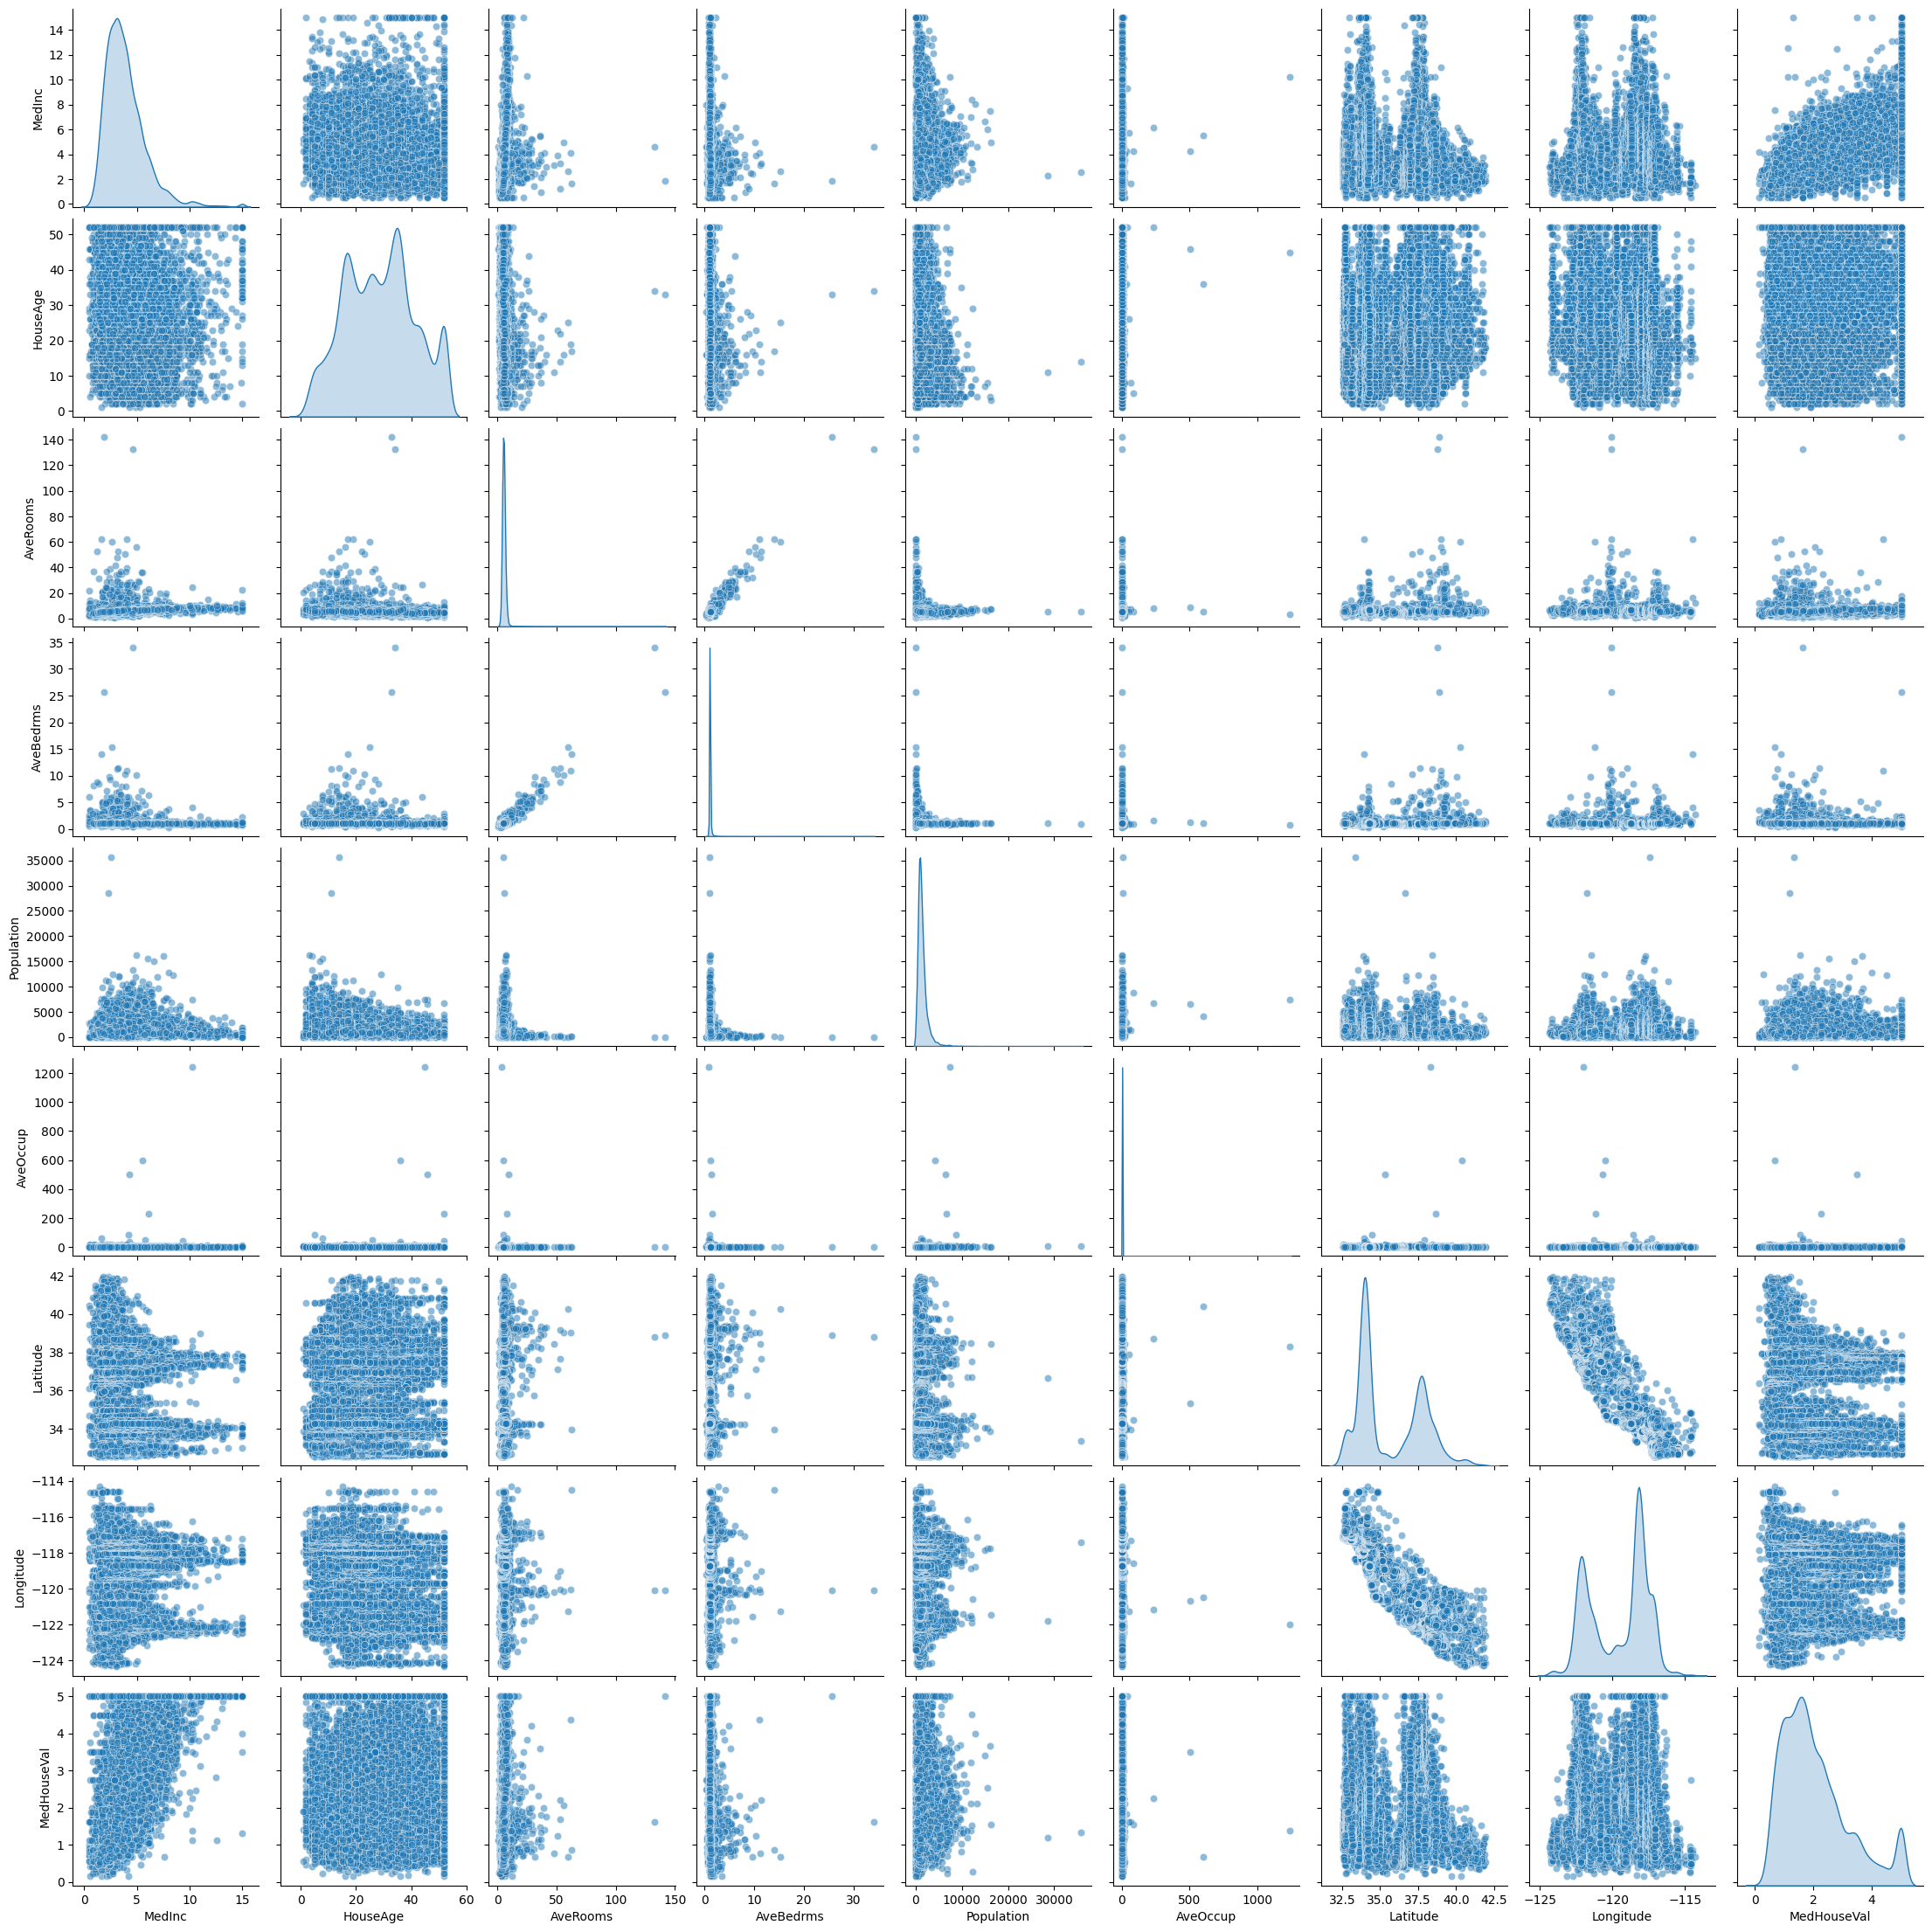

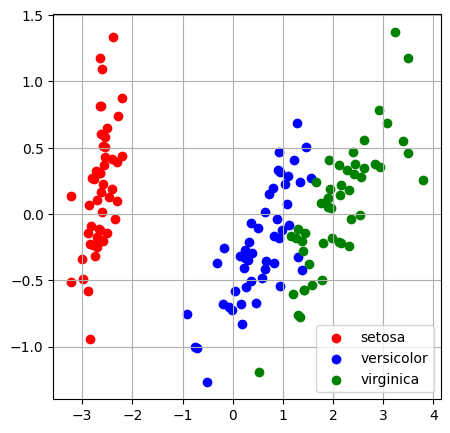

In [41]:
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
iris=load_iris()
data=iris.data
labels=iris.target
label_names=iris.target_names
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(data)
reduced_df=pd.DataFrame(reduced_data,columns=['pc1','pc2'])
reduced_df['Label']=labels
colors=['r','b','g']
plt.figure(figsize=(5,5))
for i,label in enumerate(np.unique(labels)):
    plt.scatter(reduced_df[reduced_df['Label']==label]['pc1'],
                reduced_df[reduced_df['Label']==label]['pc2'],
                color=colors[i],
                label=label_names[label]
               )
plt.grid()
plt.legend()                    
plt.show()
                           

In [50]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('dataset.csv')
print(data)
features=np.array(data)[:,:-1]
print(features)
target=np.array(data)[:,-1]
print(target)
for i in range(len(target)):
     if target[i]=="yes":
         specific_h=features[i]
         break
print( f'the specific hypothesis {specific_h}')
for i in range(len(features)):
    if target[i]=="yes":
        for j in range(len(specific_h)):
            if specific_h[j] !=features[i,j]:
                specific_h[j]="?"
            else:
                pass
print(specific_h)

     Sky  Temp Humidity    Wind Water Forecast EnjoySport
0  Sunny  Warm   Normal  Strong  Warm     Same        yes
1  Sunny  Warm     High  Strong  Warm     Same        yes
2  Rainy  Cold     High  Strong  Warm   Change         no
3  Sunny  Warm     High  Strong  Cool   Change        yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['yes' 'yes' 'no' 'yes']
the specific hypothesis ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
['Sunny' 'Warm' '?' 'Strong' '?' '?']


In [70]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
def gen_data():
  x=np.random.rand(100)
  y=np.array(["class 1" if xi>=0.5 else "class 2" for xi in x])
  print(y)
  return x,y
def image(x,y,kvalues):
    results={}
    x_train=x[:50].reshape(-1,1)
    y_train=y[:50]
    x_test=x[50:].reshape(-1,1)
    for k in kvalues:
     knn=KNeighborsClassifier(n_neighbors=k)
     knn.fit(x_train,y_train)
     y_pred=knn.predict(x_test)
     results[k]=y_pred
    return results
x,y=gen_data()
kvalues=[1,2,3,4,5]
results=image(x,y,kvalues)
for k,prediction in results.items():
    print(f'{k} predictions are {prediction}')


['class 2' 'class 1' 'class 2' 'class 1' 'class 1' 'class 2' 'class 1'
 'class 2' 'class 2' 'class 2' 'class 1' 'class 1' 'class 1' 'class 1'
 'class 1' 'class 2' 'class 2' 'class 1' 'class 2' 'class 2' 'class 1'
 'class 2' 'class 2' 'class 2' 'class 2' 'class 2' 'class 1' 'class 2'
 'class 2' 'class 2' 'class 1' 'class 1' 'class 2' 'class 1' 'class 1'
 'class 2' 'class 1' 'class 1' 'class 1' 'class 1' 'class 2' 'class 2'
 'class 1' 'class 2' 'class 2' 'class 1' 'class 1' 'class 1' 'class 1'
 'class 1' 'class 1' 'class 1' 'class 2' 'class 1' 'class 2' 'class 2'
 'class 2' 'class 2' 'class 2' 'class 2' 'class 2' 'class 2' 'class 1'
 'class 2' 'class 1' 'class 1' 'class 1' 'class 1' 'class 1' 'class 2'
 'class 2' 'class 1' 'class 1' 'class 1' 'class 1' 'class 2' 'class 2'
 'class 2' 'class 2' 'class 1' 'class 2' 'class 1' 'class 1' 'class 2'
 'class 2' 'class 2' 'class 2' 'class 2' 'class 1' 'class 1' 'class 1'
 'class 1' 'class 1' 'class 1' 'class 2' 'class 1' 'class 1' 'class 1'
 'clas

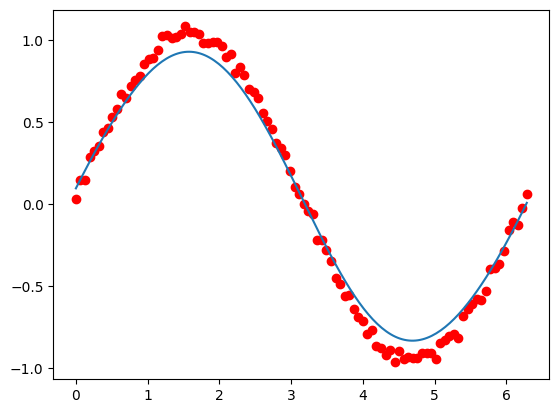

In [81]:
import numpy as np
def predict(x,X,y,tau):
    distances=np.sum((X-x)**2,axis=1)
    w=np.exp(-distances/(2*tau**2))
    W=np.diag(w)
    theta=np.linalg.pinv(X.T@W@X)@X.T@W@y
    return x@ theta
X=np.linspace(0,2*np.pi,100)
y=np.sin(X)+0.1*np.random.rand(100)
Xb=np.c_[np.ones_like(X),X]
x_test=np.linspace(0,2*np.pi,200)
Xb_test=np.c_[np.ones_like(x_test),x_test]
y_pred=np.array([predict(xi,Xb,y,0.5) for xi in Xb_test])
plt.scatter(X,y,color="red")
plt.plot(x_test,y_pred)

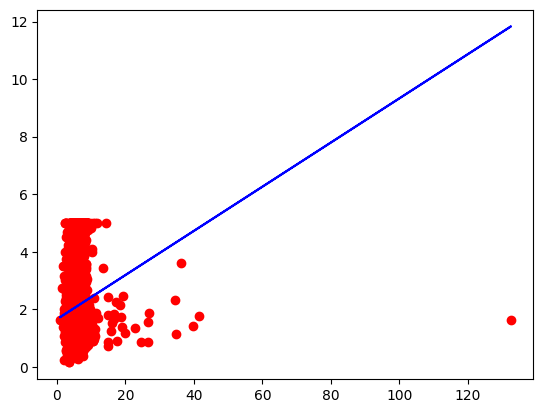

In [93]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data=fetch_california_housing(as_frame=True)
x=data.data[['AveRooms']]
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,color="blue")

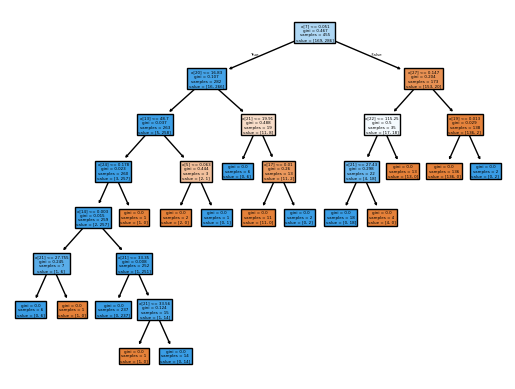

93.85964912280701
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

beinjmfr


In [106]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
data=load_breast_cancer()
x=data.data
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
plot_tree(clf,filled=True)
plt.show()
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
new=np.array([x_test[0]])
y=clf.predict(new)
print("beinjmfr" if y == 1 else "fijek")

80.83333333333333
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
         

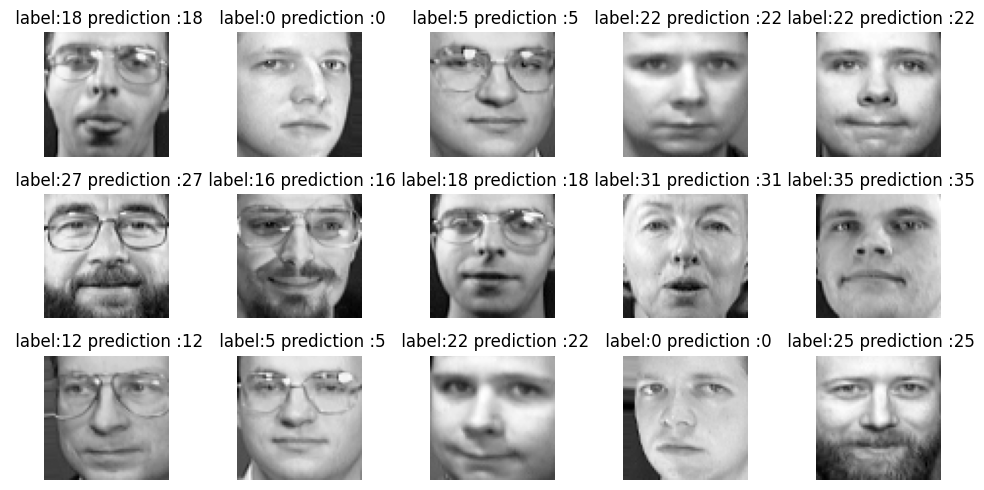

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
data=fetch_olivetti_faces(shuffle=True,random_state=42)
x=data.data
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred,zero_division=1))
fig,axes= plt.subplots(3,5,figsize=(10,5))
for ax,image,label,prediction in zip(axes.ravel(),x_test,y_test,y_pred):
    ax.imshow(image.reshape(64,64),cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(f' label:{label} prediction :{prediction}')
plt.tight_layout()
plt.show()


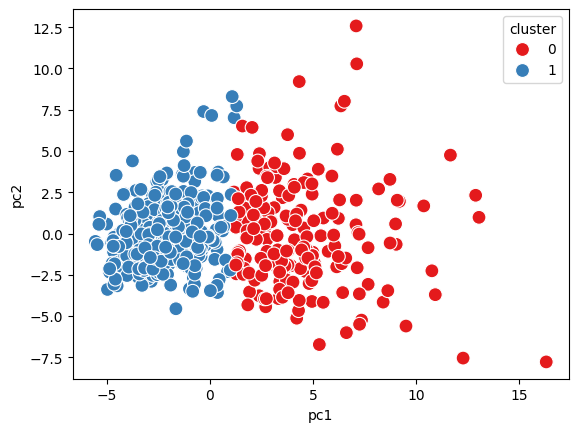

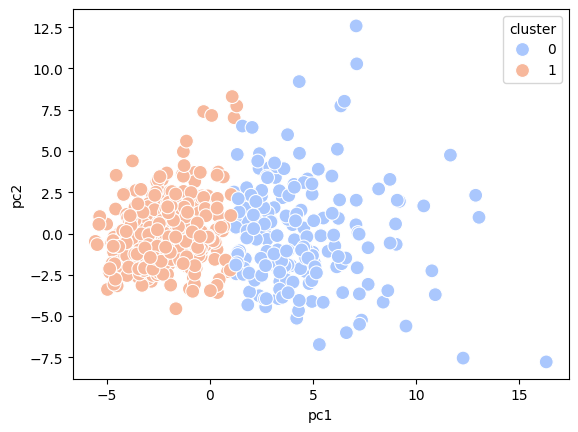

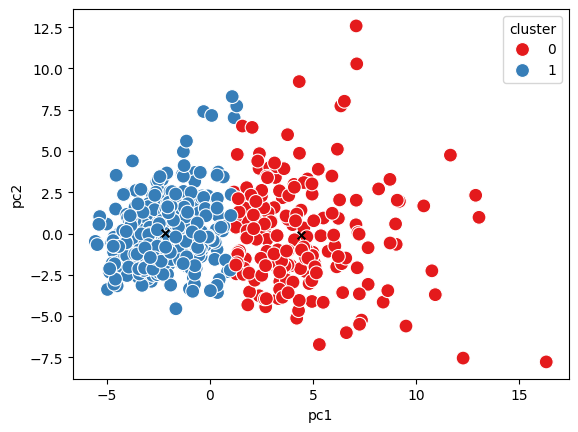

In [139]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt 
data=load_breast_cancer(as_frame=True)
x=data.data
y=data.target
scaler=StandardScaler()
pca=PCA(n_components=2)
x_scaled=scaler.fit_transform(x)
x_pca=pca.fit_transform(x_scaled)
kmeans=KMeans(n_clusters=2)
y_kmeans=kmeans.fit_predict(x_scaled)
df=pd.DataFrame(x_pca,columns=['pc1','pc2'])
df['cluster']=y_kmeans
df['label']=y
sns.scatterplot(data=df,x='pc1',y='pc2',hue='cluster',palette="Set1",s=100)
plt.show()
sns.scatterplot(data=df,x='pc1',y='pc2',hue='cluster',palette="coolwarm",s=100)
plt.show()
centers=pca.transform(kmeans.cluster_centers_)
sns.scatterplot(data=df,x='pc1',y='pc2',hue='cluster',palette="Set1",s=100)
plt.scatter(centers[:,0],centers[:,1],marker="x",color="black",s=30)
plt.show()